<a href="https://colab.research.google.com/github/Danilo-CVM/TCC/blob/Predict/V5_Classificador_KNN_e_Random_Forest_Valores_absolutos_e_indicadores_com_melhores_performances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando Bibliotecas para extração de dados do Yhoo Finance
!pip install yfinance --upgrade --no-cache-dir
import pandas as pd
import numpy as np
import yfinance as yf
import datetime as dt
from pandas_datareader import data as pdr

yf.pdr_override()

Requirement already up-to-date: yfinance in /usr/local/lib/python3.6/dist-packages (0.1.55)


In [2]:
#Indtalando Bibliotecas úteis

#Biblioteca para DropNA
!pip install --upgrade ta

from ta.utils import dropna

#Biblioteca de plotagem
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Requirement already up-to-date: ta in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [3]:
#Criando a função de importação das bases de dados
#startyear=1985
#startmonth=1
#startday=1

#endyear = 2018
#endmonth = 12
#endday = 20
#interval='1wk'

def importacao_db(ticker, ano_inicio, mes_inicio, dia_inicio, ano_final, mes_final, dia_final,intervalo):
#Definindo dados da importação do banco de dados:

#Escolha a ação
  stock= ticker

#Escolha o inicio do período
  startyear=ano_inicio
  startmonth=mes_inicio
  startday=dia_inicio

  start=dt.datetime(startyear,startmonth,startday)

#Escolha o final do período
  endyear = ano_final
  endmonth = mes_final
  endday = dia_final

  now=dt.datetime(endyear,endmonth,endday)

#Rascunho - Código para a escolha dos últimos dados
#now=dt.datetime.now()

#df=pdr.get_data_yahoo(stock,start,now)
#Dado semanais
  df=pdr.get_data_yahoo(stock,start,now, interval=intervalo)

  return df

In [4]:
#importando base do Dow Jones utilizando a função importação_db utilizando o intervalo semanal
#Intervalos validos: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
df = importacao_db("^DJI", 1985, 1, 1, 2018, 12, 20,'1wk')
#df = importacao_db("^BVSP", 2009, 1, 1, 2018, 12, 20,'1wk')

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-01,37550.0,42363.0,37550.0,40820.0,40820.0,6139000
2009-01-08,40819.0,42525.0,37658.0,37982.0,37982.0,8680800
2009-01-15,37993.0,39904.0,36806.0,38543.0,38543.0,7644400
2009-01-22,38543.0,40438.0,36744.0,40227.0,40227.0,8227600
2009-01-29,40229.0,41490.0,38453.0,40129.0,40129.0,8096200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2009-01-01 to 2018-12-13
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       520 non-null    float64
 1   High       520 non-null    float64
 2   Low        520 non-null    float64
 3   Close      520 non-null    float64
 4   Adj Close  520 non-null    float64
 5   Volume     520 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 28.4 KB


In [7]:
#Criando a função de inclusão de indicadores técnicos

def indicadores(base):
  #Incluindo os indicadores técnicos no dataframe

  ##Criando os indicadores de volatilidade Bollinger Bands e ATR

  ## Initialize Bollinger Bands Indicator
  from ta.volatility import BollingerBands
  indicator_bb = BollingerBands(close=base["Close"], window=20, window_dev=2)

  # Add Bollinger Bands features
  base['bb_bbm'] = indicator_bb.bollinger_mavg()
  base['bb_bbh'] = indicator_bb.bollinger_hband()
  base['bb_bbl'] = indicator_bb.bollinger_lband()

  # Add Percentage Bollinger Bands
  base['bb_bbp'] = indicator_bb.bollinger_pband()


  # Criando o Indicador MACD

  from ta.trend import MACD
  indicator_macd = MACD(close=base["Close"])
  base['macd_line'] = indicator_macd.macd()
  base['macd_hist'] = indicator_macd.macd_diff()
  base['macd_signal'] = indicator_macd.macd_signal()



  #Criando indicadores de Volume


  #Criando o Indicador OBV

  from ta.volume import OnBalanceVolumeIndicator
  indicator_obv = OnBalanceVolumeIndicator(close=base["Close"], volume=base["Volume"])
  base['obv'] = indicator_obv.on_balance_volume()



  ##Criando indicadores de Momentum


  ###################

  #Criando o Indicador PVO

  from ta.momentum import PercentageVolumeOscillator
  indicator_pvo = PercentageVolumeOscillator(volume=base["Volume"])
  base['pvo'] = indicator_pvo.pvo()

  ##################################

  ##Criando o Indicador RSI

  from ta.momentum import RSIIndicator
  indicator_rsi = RSIIndicator(close=base["Close"])
  base['rsi'] = indicator_rsi.rsi()

  #######################################


  #Criando o Indicador Estocástico


  from ta.momentum import StochasticOscillator
  indicator_stoch = StochasticOscillator(close=base["Close"], high=base["High"], low=base["Low"])
  base['osc_stoch'] = indicator_stoch.stoch()
  base['stoch_signal'] = indicator_stoch.stoch_signal()
  base.tail()

  return df


In [8]:
df = indicadores(df)

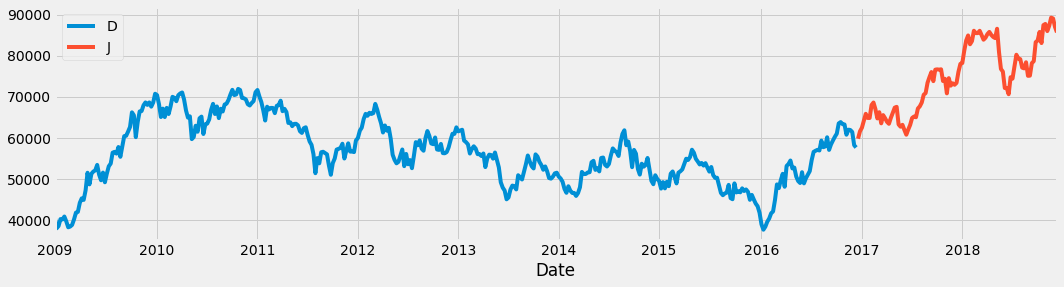

In [9]:
# We have chosen 'Adj Close' attribute for prices. Let's see what it looks like
df["Adj Close"][0:int(len(df)*0.8)].plot(figsize=(16,4),legend=True)
df["Adj Close"][int(len(df)*0.8):].plot(figsize=(16,4),legend=True)
plt.legend("DJI")
plt.show()

In [10]:
# Transformando os valores absolutos dos indicadores em variações percentuais
# o porquê disso é para a normalização dos dados, podendo, dessa forma, utilizar as variáveis em medidas compararáveis. 
#Além disso valores percentuais têm propriedades estatísticas mais gerenciáveis, como estacionariedade, que não acontece com o preço, por exemplo.
# fonte de consulta: https://www.probabilitycourse.com/chapter10/10_1_4_stationary_processes.php

df2 = df.pct_change()

In [11]:
#Transformando os valores de variações percentuais para variações logaritmicas
#Fazemos isso, por alguns fatores, dentre os quais o mais importnte é forçar uma distribuição normal dos valores de variação percentual.
# Além disso, essa transformação faz com que varições muito pequenas se aproximem das demais variações melhorando a qualidade do algoritimo de aprendizado de máquina.
#fonte: https://quantivity.wordpress.com/2011/02/21/why-log-returns/

df3 = np.log(1 + df2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log
  


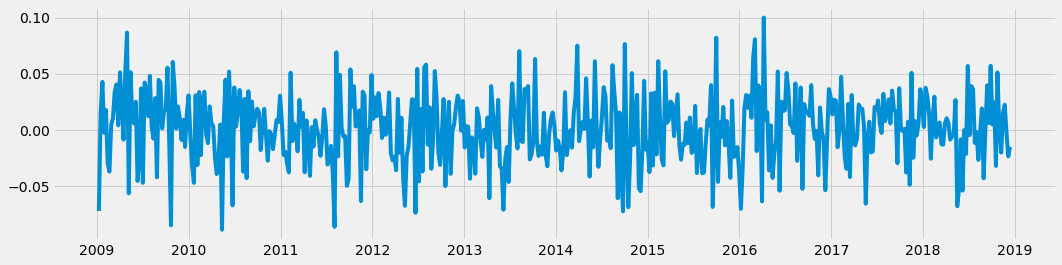

In [12]:
plt.figure(1, figsize=(16,4))
plt.plot(df3["Adj Close"])

In [13]:
df3.head(60)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal
Date,,,,,,,,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-08,0.083474,0.003817,0.002872,-0.072060,-0.072060,0.346452,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-15,-0.071746,-0.063616,-0.022885,0.014662,0.014662,-0.127140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-01-22,0.014373,0.013293,-0.001686,0.042764,0.042764,0.073521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.960282,NaN,NaN,NaN,NaN
2009-01-29,0.042814,0.025682,0.045462,-0.002439,-0.002439,-0.016100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.934856,NaN,NaN,NaN,NaN
2009-02-05,-0.002713,0.045951,0.034204,0.017710,0.017710,0.192578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.056176,NaN,NaN,NaN,NaN
2009-02-12,0.017469,-0.037527,-0.014734,-0.029113,-0.029113,-0.242701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.716760,NaN,NaN,NaN,NaN
2009-02-19,-0.028622,-0.034230,-0.039405,-0.037023,-0.037023,-0.632581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.813294,NaN,NaN,NaN,NaN
2009-02-26,-0.036996,-0.030485,-0.053734,0.004437,0.004437,0.723153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.277351,NaN,NaN,NaN,NaN


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 520 entries, 2009-01-01 to 2018-12-13
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          519 non-null    float64
 1   High          519 non-null    float64
 2   Low           519 non-null    float64
 3   Close         519 non-null    float64
 4   Adj Close     519 non-null    float64
 5   Volume        519 non-null    float64
 6   bb_bbm        500 non-null    float64
 7   bb_bbh        500 non-null    float64
 8   bb_bbl        500 non-null    float64
 9   bb_bbp        476 non-null    float64
 10  macd_line     476 non-null    float64
 11  macd_hist     456 non-null    float64
 12  macd_signal   472 non-null    float64
 13  obv           499 non-null    float64
 14  pvo           437 non-null    float64
 15  rsi           506 non-null    float64
 16  osc_stoch     506 non-null    float64
 17  stoch_signal  504 non-null    float64
dtypes: float64(

In [15]:
# Criando uma coluna LABEL
def f(row):
    if row['Adj Close']  > 0.002:
        val = 1
    else:
        val = 0
    return val

df2['Label'] = df2.apply(f, axis=1)

In [16]:
df2.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2009-01-08,0.087057,0.003824,0.002876,-0.069525,-0.069525,0.414041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.414041,NaN,NaN,NaN,NaN,0
2009-01-15,-0.069232,-0.061634,-0.022625,0.014770,0.014770,-0.119390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.007475,NaN,NaN,NaN,NaN,1
2009-01-22,0.014476,0.013382,-0.001685,0.043691,0.043691,0.076291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.612433,NaN,NaN,NaN,NaN,1
2009-01-29,0.043743,0.026015,0.046511,-0.002436,-0.002436,-0.015971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.607358,NaN,NaN,NaN,NaN,0
2009-02-05,-0.002709,0.047023,0.034796,0.017867,0.017867,0.212371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.875353,NaN,NaN,NaN,NaN,1
2009-02-12,0.017622,-0.036832,-0.014626,-0.028693,-0.028693,-0.215494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511668,NaN,NaN,NaN,NaN,0
2009-02-19,-0.028217,-0.033651,-0.038639,-0.036346,-0.036346,-0.468781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.556605,NaN,NaN,NaN,NaN,0
2009-02-26,-0.036320,-0.030025,-0.052316,0.004447,0.004447,1.060920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.587123,NaN,NaN,NaN,NaN,1


In [17]:
#Deslocando a coluna "Label" para que possamos prever o período seguinte
df2['Label'] = df2['Label'].shift(-1) 
df2.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2009-01-08,0.087057,0.003824,0.002876,-0.069525,-0.069525,0.414041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.414041,NaN,NaN,NaN,NaN,1.0
2009-01-15,-0.069232,-0.061634,-0.022625,0.014770,0.014770,-0.119390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.007475,NaN,NaN,NaN,NaN,1.0
2009-01-22,0.014476,0.013382,-0.001685,0.043691,0.043691,0.076291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.612433,NaN,NaN,NaN,NaN,0.0
2009-01-29,0.043743,0.026015,0.046511,-0.002436,-0.002436,-0.015971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.607358,NaN,NaN,NaN,NaN,1.0
2009-02-05,-0.002709,0.047023,0.034796,0.017867,0.017867,0.212371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.875353,NaN,NaN,NaN,NaN,0.0
2009-02-12,0.017622,-0.036832,-0.014626,-0.028693,-0.028693,-0.215494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.511668,NaN,NaN,NaN,NaN,0.0
2009-02-19,-0.028217,-0.033651,-0.038639,-0.036346,-0.036346,-0.468781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.556605,NaN,NaN,NaN,NaN,1.0
2009-02-26,-0.036320,-0.030025,-0.052316,0.004447,0.004447,1.060920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.587123,NaN,NaN,NaN,NaN,1.0


In [18]:
#Após ter testado os resultado dos classificadores com os valores logaritimocos dos indicadores, testei os valores originais, apenas normalizados e o resultado foi melhor, por isso estou igualando df3
# a df, nessa linha de codigo, pois o script se mantem pronto para novos testes futuros.
df3 = df

In [19]:
#Concatenando o database logarítimico com os labels gerados no database percentual normal
df3=pd.concat([df3,df2['Label']], axis = 1)
df3.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,37550.0,42363.0,37550.0,40820.0,40820.0,6139000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6139000,NaN,NaN,NaN,NaN,0.0
2009-01-08,40819.0,42525.0,37658.0,37982.0,37982.0,8680800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2541800,NaN,NaN,NaN,NaN,1.0
2009-01-15,37993.0,39904.0,36806.0,38543.0,38543.0,7644400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5102600,NaN,NaN,NaN,NaN,1.0
2009-01-22,38543.0,40438.0,36744.0,40227.0,40227.0,8227600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13330200,NaN,NaN,NaN,NaN,0.0
2009-01-29,40229.0,41490.0,38453.0,40129.0,40129.0,8096200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5234000,NaN,NaN,NaN,NaN,1.0
2009-02-05,40120.0,43441.0,39791.0,40846.0,40846.0,9815600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15049600,NaN,NaN,NaN,NaN,0.0
2009-02-12,40827.0,41841.0,39209.0,39674.0,39674.0,7700400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7349200,NaN,NaN,NaN,NaN,0.0
2009-02-19,39675.0,40433.0,37694.0,38232.0,38232.0,4090600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3258600,NaN,NaN,NaN,NaN,1.0
2009-02-26,38234.0,39219.0,35722.0,38402.0,38402.0,8430400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11689000,NaN,NaN,NaN,NaN,1.0


In [20]:
df3.head(60)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
2009-01-01,37550.0,42363.0,37550.0,40820.0,40820.0,6139000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6139000,NaN,NaN,NaN,NaN,0.0
2009-01-08,40819.0,42525.0,37658.0,37982.0,37982.0,8680800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2541800,NaN,NaN,NaN,NaN,1.0
2009-01-15,37993.0,39904.0,36806.0,38543.0,38543.0,7644400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5102600,NaN,NaN,NaN,NaN,1.0
2009-01-22,38543.0,40438.0,36744.0,40227.0,40227.0,8227600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13330200,NaN,NaN,NaN,NaN,0.0
2009-01-29,40229.0,41490.0,38453.0,40129.0,40129.0,8096200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5234000,NaN,NaN,NaN,NaN,1.0
2009-02-05,40120.0,43441.0,39791.0,40846.0,40846.0,9815600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15049600,NaN,NaN,NaN,NaN,0.0
2009-02-12,40827.0,41841.0,39209.0,39674.0,39674.0,7700400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7349200,NaN,NaN,NaN,NaN,0.0
2009-02-19,39675.0,40433.0,37694.0,38232.0,38232.0,4090600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3258600,NaN,NaN,NaN,NaN,1.0
2009-02-26,38234.0,39219.0,35722.0,38402.0,38402.0,8430400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11689000,NaN,NaN,NaN,NaN,1.0


In [21]:
#Eliminando Valores ausentes e infinitos
df3 = df3.dropna()
filter1 = df3.iloc[df3.values==np.inf]
df3 = df3.drop(filter1.index, axis=0)

In [22]:
df3.iloc[df3.values==np.inf]

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,


In [23]:
df3.head(15)

,Open,High,Low,Close,Adj Close,Volume,bb_bbm,bb_bbh,bb_bbl,bb_bbp,macd_line,macd_hist,macd_signal,obv,pvo,rsi,osc_stoch,stoch_signal,Label
Date,,,,,,,,,,,,,,,,,,,
2009-08-20,56173.0,58634.0,56143.0,57766.0,57766.0,6227400,51627.00,58550.427157,44703.572843,0.943350,3433.472674,337.197718,3096.274956,115112400,-3.358275,71.909636,91.631315,91.835489,0.0
2009-08-27,57769.0,58136.0,55386.0,55386.0,55386.0,7113600,52132.65,58587.297079,45678.002921,0.752016,3314.431967,174.525609,3139.906358,107998800,-2.707128,63.332124,68.684921,82.338617,1.0
2009-09-03,55389.0,58089.0,55339.0,57910.0,57910.0,5203000,52783.75,58795.846801,46771.653199,0.926328,3384.739881,195.866818,3188.873062,113201800,-4.428924,67.728461,93.019668,84.445301,1.0
2009-09-10,57908.0,60526.0,57615.0,60411.0,60411.0,6451400,53442.95,59756.952201,47128.947799,1.051793,3600.761866,329.511043,3271.250823,119653200,-4.256678,71.389017,99.062296,86.922295,0.0
2009-09-17,60409.0,62017.0,60014.0,60496.0,60496.0,7351400,53892.80,60839.056419,46946.543581,0.975306,3735.756163,371.604272,3364.151891,127004600,-2.991567,71.507308,88.942203,93.674722,1.0
2009-09-24,60496.0,61926.0,59600.0,61518.0,61518.0,5977800,54534.75,61800.702928,47268.797072,0.980546,3880.475272,413.058705,3467.416567,132982400,-3.612352,72.955144,96.372228,94.792242,1.0
2009-10-01,61519.0,63291.0,59678.0,62638.0,62638.0,7551800,55104.40,63007.823850,47200.976150,0.976604,4038.981978,457.252329,3581.729649,140534200,-2.174152,74.485274,95.655067,93.656499,1.0
2009-10-08,62640.0,66393.0,62640.0,66201.0,66201.0,6206000,55824.85,64925.422691,46724.277309,1.070082,4401.367779,655.710504,3745.657275,146740200,-2.627088,78.627883,98.941040,96.989445,0.0
2009-10-15,66199.0,67530.0,64076.0,65486.0,65486.0,8657000,56494.80,66338.495985,46651.104015,0.956698,4578.093205,665.948743,3912.144461,138083200,-0.070942,75.962515,87.852856,94.149654,0.0


In [24]:
#neg, pos = np.bincount(df3['Label'])
#total = neg + pos
#print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    #total, pos, 100 * pos / total))

In [25]:
df3= df3.drop('Open', axis=1 )
df3= df3.drop('Close', axis=1)
df3= df3.drop('Volume', axis=1)
df3= df3.drop('bb_bbm', axis=1)
df3= df3.drop('bb_bbh', axis=1)
df3= df3.drop('bb_bbl', axis=1)
df3= df3.drop('bb_bbp', axis=1)
df3= df3.drop('macd_hist', axis=1)
df3= df3.drop('pvo', axis=1 )
#df3= df3.drop('Low', axis=1 )
#df3= df3.drop('High', axis=1 )
df3= df3.drop('rsi', axis=1 )
#df3= df3.drop('Adj Close', axis=1 )
df3= df3.drop('macd_line', axis=1 )
df3= df3.drop('macd_signal', axis=1 )
#df3= df3.drop('obv', axis=1 )
df3= df3.drop('osc_stoch', axis=1 )
df3= df3.drop('stoch_signal', axis=1 )

In [26]:
df3

,High,Low,Adj Close,obv,Label
Date,,,,,
2009-08-20,58634.0,56143.0,57766.0,115112400,0.0
2009-08-27,58136.0,55386.0,55386.0,107998800,1.0
2009-09-03,58089.0,55339.0,57910.0,113201800,1.0
2009-09-10,60526.0,57615.0,60411.0,119653200,0.0
2009-09-17,62017.0,60014.0,60496.0,127004600,1.0
...,...,...,...,...,...
2018-11-08,88570.0,84030.0,85973.0,350952900,1.0
2018-11-15,88516.0,85975.0,87269.0,363919800,1.0
2018-11-22,89483.0,84905.0,89251.0,385137200,0.0


#Classificador KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [28]:
# Separando dados de Entrada e Saída para treino e teste
train_data, test_data = df3[0:int(len(df3)*0.8)], df3[int(len(df3)*0.8):]

X_train = train_data.drop(['Label'], axis=1).values
X_test = test_data.drop(['Label'], axis=1).values
Y_train = train_data['Label'].values
Y_test = test_data['Label'].values

In [29]:
# Inserindo mais uma dimensão a Y_train, para que o algoritimo MinMaxScaler e o KNN consigam trabalhar.
Y_train = np.reshape(Y_train, (-1,1))

In [30]:
#Normalizando os dados
sc = MinMaxScaler(feature_range=(0,1))
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
#Treinando o modelo KNN
n_neighbors = 5
clf = KNeighborsClassifier(n_neighbors=n_neighbors)
clf.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [32]:
y_pred = clf.predict(X_test)
y_pred

array([0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0.])

In [33]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [34]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.43      0.47        46
         1.0       0.55      0.62      0.58        52

    accuracy                           0.53        98
   macro avg       0.53      0.53      0.52        98
weighted avg       0.53      0.53      0.53        98



In [35]:
confusion_matrix(Y_test, y_pred)

array([[20, 26],
       [20, 32]])

In [36]:
#Testando para Bovespa

#importando base do iBOVESPA utilizando a função importação_db utilizando o intervalo semanal
ibov = importacao_db("^BVSP", 2016, 1, 1, 2018, 12, 20,'1wk')

ibov = indicadores(ibov)

ibov2 = ibov.pct_change()

ibov2['Label'] = ibov2.apply(f, axis=1)

ibov2['Label'] = ibov2['Label'].shift(-1) 

ibov3 =pd.concat([ibov,ibov2['Label']], axis = 1)

ibov3 = ibov3.dropna()

filter1 = ibov3.iloc[ibov3.values==np.inf]

ibov3 = ibov3.drop(filter1.index, axis=0)

ibov3= ibov3.drop('Open', axis=1 )
ibov3= ibov3.drop('Close', axis=1)
ibov3= ibov3.drop('Volume', axis=1)
ibov3= ibov3.drop('bb_bbm', axis=1)
ibov3= ibov3.drop('bb_bbh', axis=1)
ibov3= ibov3.drop('bb_bbl', axis=1)
ibov3= ibov3.drop('bb_bbp', axis=1)
ibov3= ibov3.drop('macd_hist', axis=1)
ibov3= ibov3.drop('pvo', axis=1 )
#ibov3= ibov3.drop('Low', axis=1 )
#ibov3= ibov3.drop('High', axis=1 )
ibov3= ibov3.drop('rsi', axis=1 )
#ibov3= ibov3.drop('Adj Close', axis=1 )
ibov3= ibov3.drop('macd_line', axis=1 )
ibov3= ibov3.drop('macd_signal', axis=1 )
#ibov3= ibov3.drop('obv', axis=1 )
ibov3= ibov3.drop('osc_stoch', axis=1 )
ibov3= ibov3.drop('stoch_signal', axis=1 )

[*********************100%***********************]  1 of 1 completed


In [37]:
#Realizando a previsão com dados do Bovespa para utilização na otimização da carteira
X_test_BOV = ibov3.drop(['Label'], axis=1).values
Y_test_BOV = ibov3['Label'].values

X_test_BOV = sc.fit_transform(X_test_BOV)

previsao_test = clf.predict(X_test_BOV)
previsao_test

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
print(classification_report(Y_test_BOV, previsao_test))

              precision    recall  f1-score   support

         0.0       0.49      0.46      0.47       245
         1.0       0.48      0.51      0.50       241

    accuracy                           0.49       486
   macro avg       0.49      0.49      0.49       486
weighted avg       0.49      0.49      0.49       486



In [39]:
confusion_matrix(Y_test_BOV, previsao_test)

array([[113, 132],
       [118, 123]])

#Classificador Random Forest

In [40]:
Y_train = train_data['Label'].values

In [41]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 100, random_state = 10)
# Train the model on training data
rf = rf.fit(X_train, Y_train);

In [42]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)


In [43]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.48      0.48      0.48        46
         1.0       0.54      0.54      0.54        52

    accuracy                           0.51        98
   macro avg       0.51      0.51      0.51        98
weighted avg       0.51      0.51      0.51        98



In [44]:
confusion_matrix(Y_test, predictions)

array([[22, 24],
       [24, 28]])

## Classificador MLP

In [45]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [46]:
clf = MLPClassifier(solver = 'sgd', hidden_layer_sizes=(3,),learning_rate_init=0.01, activation='logistic', max_iter=1500, random_state=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict_proba(X_test)
y_aux = np.argmax(y_pred,1)
accuracy_score(Y_test, y_aux)

0.46938775510204084